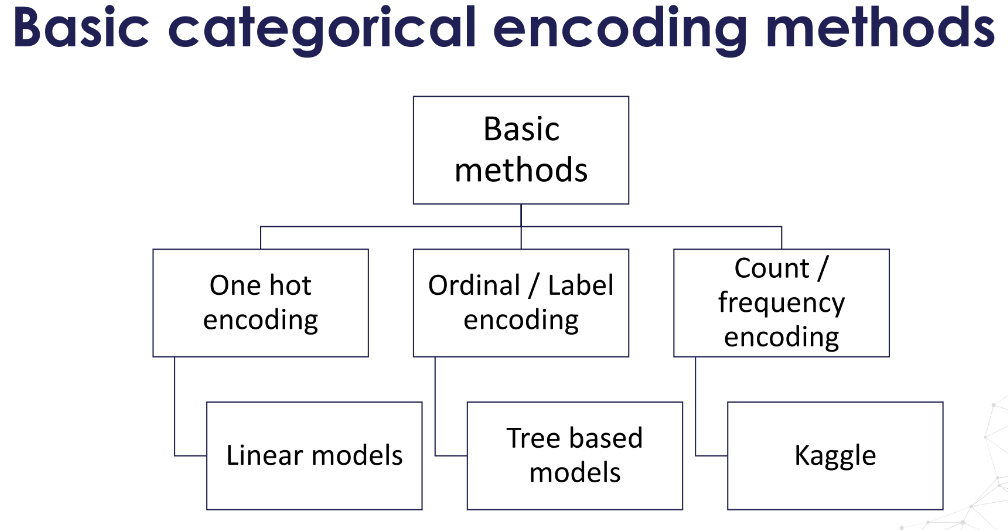

#OneHotEncoding

**Advantages of one hot encoding**
* Straightforward to implement
* Makes no assumption about the distribution of the categorical variables
* Keeps all the information of the categorical variable
* Suitable for linear models

## **One hot encoding with pandas**

**Advantages using pandas**
* quick
* returns pandas dataframe
* returns feature names for the dummy variables
* get_dummies automatically recognises variables of type
* object and categorical, ignoring numerical variables.

In [ ]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop("survived", axis=1),  # predictors
    data["survived"],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0,  # seed to ensure reproducibility
)

X_train.shape, X_test.shape

In [ ]:
# ENCODE INDIVIDUAL COLUMNS
# Step 1: Create dummy variables for the 'sex' column
# Using get_dummies to convert categorical 'sex' into dummy variables, dropping the first category to get k-1 labels
tmp = pd.get_dummies(X_train["sex"], drop_first=True)
tmp.head()  # Display the first few rows of the encoded data

# Step 2: Create dummy variables for the 'embarked' column
# Similar to the previous step, converting 'embarked' into k-1 dummy variables
tmp = pd.get_dummies(X_train["embarked"], drop_first=True)
tmp.head()  # Display the first few rows of the encoded data

# ENCODE INDIVIDUAL COLUMNS
# Step 1: Encode the entire training set
# Convert all categorical variables in X_train into dummy variables, dropping the first category for each
X_train_enc = pd.get_dummies(X_train, drop_first=True)

print(X_train_enc.shape)  # Print the shape of the transformed training data
X_train_enc.head()  # Display the first few rows of the encoded training set

# Step 2: Encode the entire test set
# Apply the same transformation to the test set, ensuring consistency between train and test data
X_test_enc = pd.get_dummies(X_test, drop_first=True)

print(X_test_enc.shape)  # Print the shape of the transformed test data
X_test_enc.head()  # Display the first few rows of the encoded test set

# BONUS: Adding a dummy variable for missing data
# Example of adding a dummy variable that indicates missing values in 'embarked'
pd.get_dummies(X_train["embarked"], drop_first=True, dummy_na=True).head()

## One hot encoding with Sklearn

**Advantages**
* quick
* Creates the same number of features in train and test set
* works within a pipeline

In [ ]:
# sklearn
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

# To start, we fillna manually. Later on
# we add this step to a pipeline

X_train.fillna("Missing", inplace=True)
X_test.fillna("Missing", inplace=True)

In [ ]:
# Step 1: Set up the OneHotEncoder
# Configuring the OneHotEncoder to handle categorical variables
encoder = OneHotEncoder(
    categories="auto",      # Automatically determine the categories from the data
    drop="first",           # Drop the first category to avoid the dummy variable trap, resulting in k-1 columns
    sparse_output=False,    # Return dense output as a DataFrame instead of sparse matrix
    handle_unknown="error"  # Raise an error if an unknown category is encountered during transformation
)

# Step 2: Set the encoder to output a pandas DataFrame
encoder.set_output(transform="pandas")

# Step 3: Fit the encoder on the training data
# This step learns the categories in each categorical column of the training data
encoder.fit(X_train)

# Step 4: Observe the learned categories
encoder.categories_  # Display the categories learned from the training data

# Step 5: Transform the training and test datasets
# Convert the categorical variables in the training and test sets into one-hot encoded variables
X_train_enc = encoder.transform(X_train)
X_test_enc = encoder.transform(X_test)

X_train_enc.head()  # Display the first few rows of the encoded training set

# Step 6: Retrieve the feature names
# Get the names of the generated one-hot encoded features
encoder.get_feature_names_out()

### Encoding variable subset

In [ ]:
# Step 1: Set up the OneHotEncoder
# Configuring the OneHotEncoder to handle categorical variables
encoder = OneHotEncoder(
    categories="auto",      # Automatically determine the categories from the data
    drop="first",           # Drop the first category to avoid the dummy variable trap, resulting in k-1 columns
    sparse_output=False,    # Return dense output as a DataFrame instead of a sparse matrix
    handle_unknown="error"  # Raise an error if an unknown category is encountered during transformation
)

# Step 2: Select the variables to encode with ColumnTransformer
# The ColumnTransformer applies the OneHotEncoder to the specified columns
ct = ColumnTransformer(
    [("encoder", encoder, ["sex", "embarked", "cabin"])],  # Apply encoder to "sex", "embarked", and "cabin"
    remainder="passthrough"  # Keep all other columns unchanged
)

# Step 3: Set the output of the ColumnTransformer to be a pandas DataFrame
ct.set_output(transform="pandas")

# Step 4: Fit the ColumnTransformer on the training data
# This step learns the categories in the specified columns
ct.fit(X_train)

# Step 5: Encode the training and test datasets
# Transform the categorical variables into one-hot encoded variables
X_train_enc = ct.transform(X_train)
X_test_enc = ct.transform(X_test)

# Step 6: Display the first few rows of the encoded training data
X_train_enc.head()

### imputation and Encoding pipeline

In [ ]:
# Step 1: Set up the OneHotEncoder
# This encoder will convert categorical variables into one-hot encoded variables (dummy variables)
encoder = OneHotEncoder(
    categories="auto",       # Automatically determine the categories from the data
    drop="first",            # Drop the first category to avoid multicollinearity (dummy variable trap)
    sparse_output=False,     # Return dense output as a DataFrame instead of a sparse matrix
    handle_unknown="error"   # Raise an error if an unknown category is encountered during transformation
)

# Step 2: Set up a pipeline for imputation and encoding
# We use a SimpleImputer to replace missing values in categorical variables before encoding them
pipe = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),  # Impute missing values with "missing"
        ("ohe", encoder),  # Apply OneHotEncoder after imputation
    ]
)

# Step 3: Select the variables to transform (impute + encode)
# ColumnTransformer will apply the pipeline to the specified columns, leaving the rest unchanged
ct = ColumnTransformer(
    [("encoder", pipe, ["sex", "embarked", "cabin"])],  # Apply imputation and encoding to "sex", "embarked", and "cabin"
    remainder="passthrough"  # Keep all other columns unchanged
)

# Step 4: Set the output format of the ColumnTransformer to be a pandas DataFrame
ct.set_output(transform="pandas")

# Step 5: Fit the ColumnTransformer on the training data
# Learn the imputation and encoding parameters from the training data
ct.fit(X_train)

# Step 6: Transform the training and test datasets
# Apply the imputation and encoding pipeline to both the training and test datasets
X_train_enc = ct.transform(X_train)
X_test_enc = ct.transform(X_test)

# Step 7: Display the first few rows of the transformed training data
X_train_enc.head()

# Step 8: Verify the size of the resulting dataframes
# Check that the number of rows and columns in the transformed datasets matches the original
X_train_enc.shape, X_test_enc.shape

## One hot encoding with Feature Engine

**Advantages**
* quick
* returns dataframe
* returns feature names
* allows to select features to encode
* appends dummies to original dataset

In [ ]:
# Step 1: Import the necessary modules from Feature-engine
from feature_engine.encoding import OneHotEncoder
from feature_engine.imputation import CategoricalImputer

# Step 2: Set up the OneHotEncoder
# This encoder will convert categorical variables into one-hot encoded variables (dummy variables)
encoder = OneHotEncoder(
    variables=None,  # If None, it will automatically find all categorical variables
    drop_last=True   # Drop the last category to return k-1 dummy variables and avoid multicollinearity
)

# Step 3: Fit the encoder on the training data
# The encoder learns the unique categories in each categorical variable
encoder.fit(X_train)

# Step 4: Automatically found categorical variables
# Display the list of variables that the encoder identified as categorical
encoder.variables_

# Step 5: Observe the learned categories
# Display the dictionary of categories that the encoder learned for each variable
encoder.encoder_dict_

# Step 6: Transform the training and test datasets
# Apply the learned encoding to both the training and test datasets
X_train_enc = encoder.transform(X_train)
X_test_enc = encoder.transform(X_test)

# Step 7: Display the first few rows of the transformed training data
X_train_enc.head()

# Step 8: Retrieve the feature names of the one-hot encoded variables
# Get the names of the newly created dummy variables (columns)
encoder.get_feature_names_out()

### Imputation and Encoding pipeline

In [ ]:
# Step 1: Set up the pipeline for imputation and encoding
# This pipeline will first impute missing categorical values and then encode them
pipe = Pipeline(
    [
        # Step 2: Categorical imputation
        # The CategoricalImputer will fill in missing values for categorical variables
        ("imputer", CategoricalImputer()),

        # Step 3: One-hot encoding
        # The OneHotEncoder will convert categorical variables into dummy variables (k-1 encoded)
        ("ohe", OneHotEncoder(drop_last=True)),
    ]
)

# Step 4: Fit the pipeline on the training data
# The pipeline first imputes missing values and then encodes the categorical variables
pipe.fit(X_train)

# Step 5: Transform the training and test data
# Apply the same imputation and encoding steps to both the training and test datasets
X_train_enc = pipe.transform(X_train)
X_test_enc = pipe.transform(X_test)

# Step 6: Display the first few rows of the transformed training data
X_train_enc.head()

## OneHotEncoding with Category Encoders

**Advantages**
* quick
* returns dataframe
* returns feature names
* allows to select features to encode
* appends dummies to original dataset

**Limitations**
* No option for k-1 dummies

In [ ]:
from category_encoders.one_hot import OneHotEncoder

# Step 1: Set up the OneHotEncoder
# This encoder will convert categorical variables into one-hot encoded variables
encoder = OneHotEncoder(
    cols=None,  # Optionally, pass a list of specific columns to encode; None means all categorical columns are encoded
    use_cat_names=True,  # This option keeps the original category names in the encoded columns
)

# Step 2: Fit the encoder on the training data
# The encoder learns the categories present in the data
encoder.fit(X_train)

# Step 3: Display the automatically found columns (variables) to be encoded
# These are the columns that will be one-hot encoded
encoder.cols

# Step 4: View the mapping of original categories to the new encoded columns
# The mapping shows how each category will be represented in the new columns
encoder.mapping

# Step 5: Transform the training and test data
# Apply the one-hot encoding to both the training and test datasets
X_train_enc = encoder.transform(X_train)
X_test_enc = encoder.transform(X_test)

# Step 6: Display the first few rows of the transformed training data
X_train_enc.head()

# Step 7: Retrieve the names of the newly created features (encoded columns)
encoder.get_feature_names_out()

# Ordinal Encoding

**Advantages**
* quick
* returns pandas dataframe

**Limitations of pandas:**
* it does not preserve information from train data to propagate to test data

## Ordinal Encoding with pandas

In [ ]:
# Step 1: Create a dictionary mapping categories to numbers
# This creates a mapping where each unique category in the 'Neighborhood' column
# is assigned a unique integer. 'enumerate' is used to generate these integers.
ordinal_mapping = {k: i for i, k in enumerate(X_train["Neighborhood"].unique(), 0)}

# Display the mapping dictionary to see the assigned integers
ordinal_mapping

# Step 2: Replace the categorical labels with the corresponding integers
# The 'map' function is used to replace the categories in the 'Neighborhood' column
# of both the training and test datasets with the integers defined in the mapping.
X_train["Neighborhood"] = X_train["Neighborhood"].map(ordinal_mapping)
X_test["Neighborhood"] = X_test["Neighborhood"].map(ordinal_mapping)

# Step 3: Explore the result by displaying the first 10 entries of the transformed 'Neighborhood' column
X_train["Neighborhood"].head(10)

## Ordinal encoding with sklearn

**Advantages**
* Straightforward to implement
* Does not expand the feature space

**Limitations**
* Does not capture any information about the categories labels
* Not suitable for linear models.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

# Step 1: Identify the categorical variables in the training dataset
# Select columns with object data type (categorical variables)
cat_vars = list(X_train.select_dtypes(include="O").columns)
print(cat_vars)  # Display the list of categorical variables

# Step 2: Initialize the OrdinalEncoder
# This encoder will convert categorical values to integers
encoder = OrdinalEncoder()

# Step 3: Set up the ColumnTransformer
# This transformer applies the OrdinalEncoder to the categorical columns
# Other columns are left unchanged ('passthrough')
ct = ColumnTransformer(
    [("oe", encoder, cat_vars)],  # Apply OrdinalEncoder to categorical variables
    remainder="passthrough"  # Keep other columns as they are
)

# Configure the transformer to output a pandas DataFrame
ct.set_output(transform="pandas")

# Step 4: Fit the ColumnTransformer on the training data
# The transformer learns the mappings for the categorical variables
ct.fit(X_train)

# Step 5: Display the categories that will be encoded for each variable
# This shows the unique values in each categorical column
print(ct.named_transformers_["oe"].categories_)

# Step 6: Transform both the training and test datasets
# Apply the encoding and retain the other columns
X_train_enc = ct.transform(X_train)
X_test_enc = ct.transform(X_test)

# Display the first few rows of the transformed training dataset
X_train_enc.head()

## Ordinal encoding with Feature Engine

**Advantages**
* Straightforward to implement
* Does not expand the feature space

**Limitations**
* Does not capture any information about the categories labels
* Not suitable for linear models.

In [ ]:
from feature_engine.encoding import OrdinalEncoder

# Step 1: Check the number of unique labels for each column
# This helps to understand the number of distinct values in each categorical column
for col in data.columns:
    print(col, ": ", len(data[col].unique()), " labels")

# OPTIONAL: Explore the unique categories for specific columns
# This is useful to understand the actual categories before encoding
print("Neighborhood categories:", data["Neighborhood"].unique())
print("Exterior1st categories:", data["Exterior1st"].unique())
print("Exterior2nd categories:", data["Exterior2nd"].unique())

# Step 2: Initialize the OrdinalEncoder from Feature-Engine
# This encoder will convert categorical variables into ordinal integers
ordinal_enc = OrdinalEncoder(
    encoding_method="arbitrary",  # Use arbitrary integers for encoding
    variables=["Neighborhood", "Exterior1st", "Exterior2nd"],  # Specify the columns to encode
)

# Step 3: Fit the encoder on the training data
# The encoder learns the mapping of categories to integers from the training set
ordinal_enc.fit(X_train)

# Step 4: Display the encoding mappings
# Shows the integer mappings assigned to each category for the specified variables
print("Encoding mappings:", ordinal_enc.encoder_dict_)

# Step 5: Transform both the training and test datasets
# Apply the encoding to convert categorical variables into integers
X_train = ordinal_enc.transform(X_train)
X_test = ordinal_enc.transform(X_test)

# Step 6: Display the transformed training data
# Shows the first few rows of the transformed dataset to verify the encoding
print(X_train.head())

## Ordinal encoding with Category Encoders

**Advantages**
* Straightforward to implement
* Does not expand the feature space

**Limitations**
* Does not capture any information about the categories labels
* Not suitable for linear models.

In [ ]:
from category_encoders.ordinal import OrdinalEncoder

# Step 1: Initialize the OrdinalEncoder from category_encoders
# This encoder will convert specified categorical variables into ordinal integers
ordinal_enc = OrdinalEncoder(
    cols=["Neighborhood", "Exterior1st", "Exterior2nd"],  # Specify columns to encode
)

# Step 2: Fit the encoder on the training data
# The encoder learns the mapping of categories to integers from the training set
ordinal_enc.fit(X_train)

# Step 3: Observe the mapping of categories to integers
# Shows the learned mappings for each specified variable
ordinal_enc.mapping

# Step 4: List the variables that will be encoded
# Displays the columns that are being transformed by the encoder
ordinal_enc.cols

# Step 5: Transform the training and test datasets
# Apply the encoding to convert categorical variables into integers
X_train = ordinal_enc.transform(X_train)
X_test = ordinal_enc.transform(X_test)

# Step 6: Display the transformed training data
# Shows the first few rows of the transformed dataset to verify the encoding
X_train.head()

# Count encoding

*Popular in kaggle competitions*

**Advantages**
* Simple
* Does not expand the feature space

**Disadvantages**
* If 2 different categories appear the same amount of times in the dataset, that is, they appear in the same number of observations, they will be replaced by the same number: may lose valuable information.

For example, if there are 10 observations for the category blue and 10 observations for the category red, both will be replaced by 10, and therefore, after the encoding, will appear to be the same thing.

In [ ]:
# Step 1: Get the count of each label in the "Neighborhood" variable
# This creates a dictionary with labels as keys and their counts as values.
count_map = X_train["Neighborhood"].value_counts().to_dict()

# Step 2: Replace the labels in "Neighborhood" with their corresponding counts
# This converts categorical labels into numeric counts for "Neighborhood."
X_train["Neighborhood"] = X_train["Neighborhood"].map(count_map)
X_test["Neighborhood"] = X_test["Neighborhood"].map(count_map)

# Step 3: Preview the first 10 rows of the modified "Neighborhood" variable
# This helps us check if the replacement with counts worked correctly.
X_train["Neighborhood"].head(10)

# Step 3.1: if instead of the count we would like the frequency
# This creates a dictionary with labels as keys and their frequency as values.
frequency_map = X_train["Exterior1st"].value_counts(normalize=True).to_dict()

# Step 4: Replace the labels in "Exterior1st" with their corresponding frequencies
# This converts categorical labels into relative frequencies for "Exterior1st."
X_train["Exterior1st"] = X_train["Exterior1st"].map(frequency_map)
X_test["Exterior1st"] = X_test["Exterior1st"].map(frequency_map)

## Count or frequency encoding with Feature-engine

In [ ]:
# Step 1: Import the CountFrequencyEncoder class from feature-engine
# This allows us to encode categorical variables using counts or frequencies.
from feature_engine.encoding import CountFrequencyEncoder

# Step 2: Initialize the encoder for count-based encoding
# This sets up the encoder to replace labels with counts for the specified variables.
count_enc = CountFrequencyEncoder(
    encoding_method="count",  # To use frequency encoding, set encoding_method='frequency'
    variables=["Neighborhood", "Exterior1st", "Exterior2nd"],
)

# Step 3: Fit the encoder on the training data
# This computes the counts for each category in the specified variables.
count_enc.fit(X_train)

# Step 4: View the encoder dictionary
# This dictionary stores the counts for each category in the specified variables.
count_enc.encoder_dict_

# Step 5: Transform the training and test data using the fitted encoder
# This replaces categorical labels with their corresponding counts in both datasets.
X_train = count_enc.transform(X_train)
X_test = count_enc.transform(X_test)

# Step 6: Preview the first few rows of the transformed training data
# This helps us check if the encoding was applied correctly.
X_train.head()

## Count or frequency encoding - Category encoders

In [ ]:
# Step 1: Initialize the encoder for count-based encoding
# This sets up the encoder to replace labels with counts for the specified variables.
count_enc = CountEncoder(
    normalize=False,  # To use frequency encoding, set normalize=True
    cols=["Neighborhood", "Exterior1st", "Exterior2nd"],
)

# Step 2: Fit the encoder on the training data
# This computes the counts for each category in the specified variables.
count_enc.fit(X_train)

# Step 3: View the encoder mapping
# This mapping shows the counts for each category in the specified variables.
count_enc.mapping

# Step 4: Transform the training and test data using the fitted encoder
# This replaces categorical labels with their corresponding counts in both datasets.
X_train = count_enc.transform(X_train)
X_test = count_enc.transform(X_test)

# Step 5: Preview the first few rows of the transformed training data
# This helps us check if the encoding was applied correctly.
X_train.head()

# Handeling Rare labels

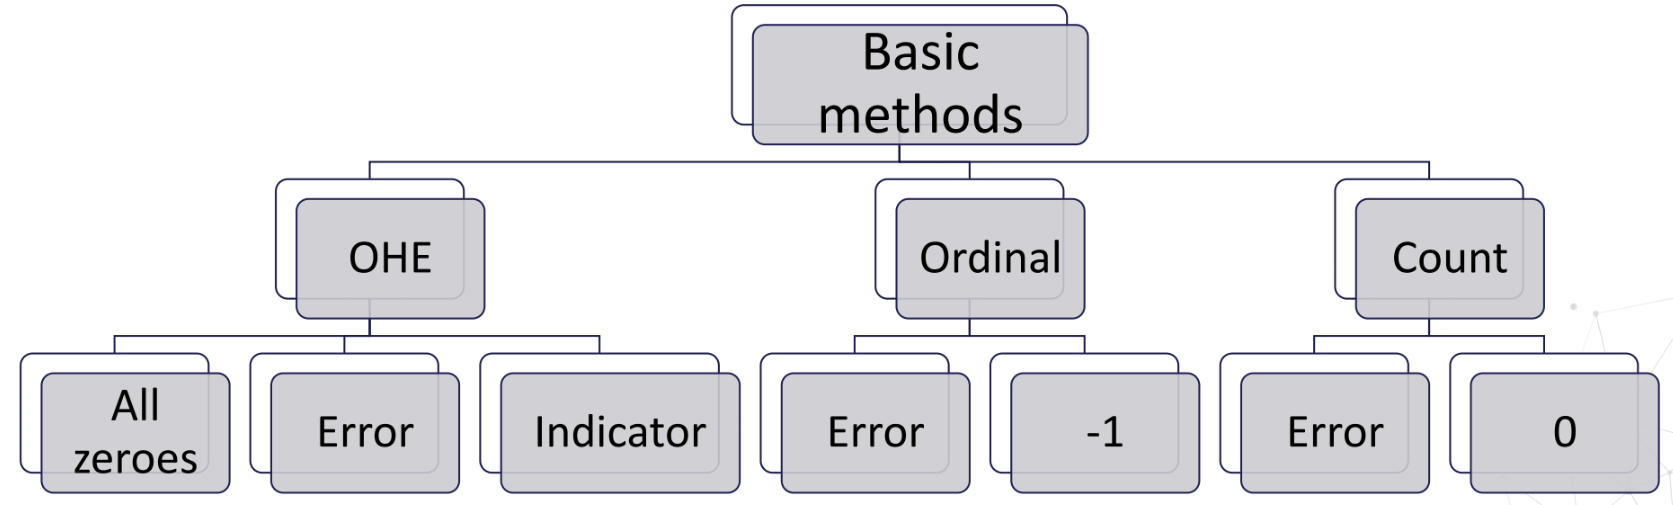

# Suitable for

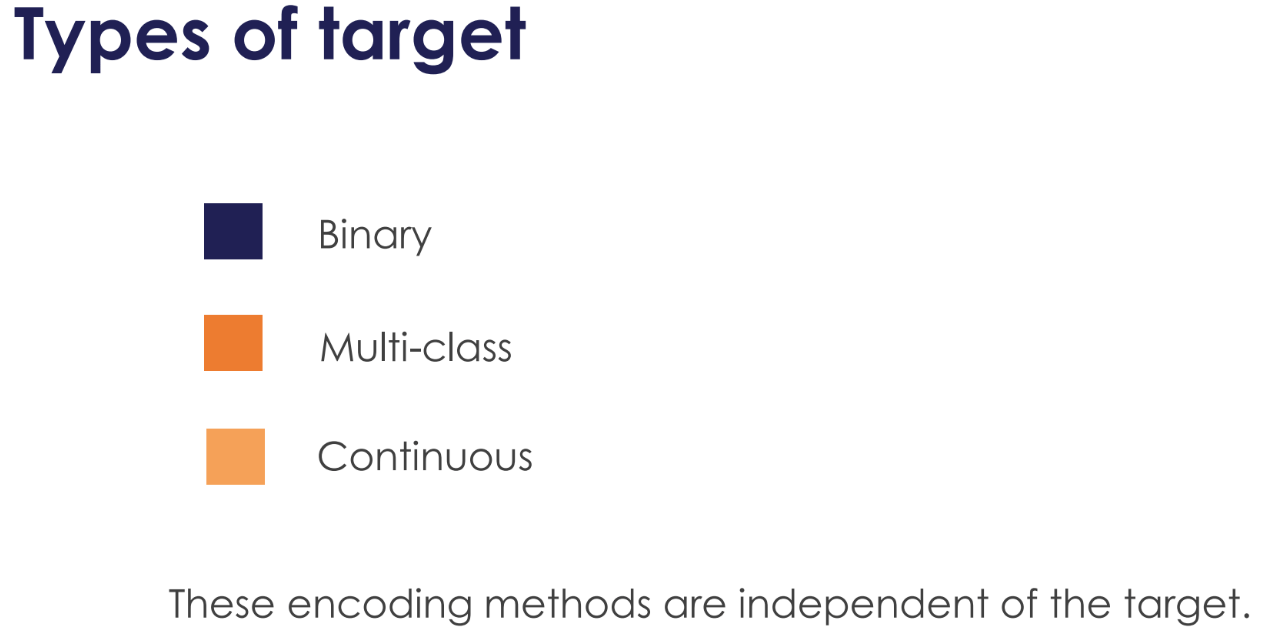